In [11]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

# Problem Formulation

Our goal in linear regression is to predict a target value $y$ starting from a vector of input values $x \in \Re^n$. For example, we might want to make predictions about the price of a house so that $y$ represents the price of the house in dollars and the elements $x_j$ of $x$ represent “features” that describe the house (such as its size and the number of bedrooms). Suppose that we are given many examples of houses where the features for the $i^{th}$ house are denoted $x(i)$ and the price is $y(i)$.

Our goal is to find a function $y=h(x)$ so that we have $y^{(i)} \approx h(x^{(i)})$ for each training example. If we succeed in finding a function $h(x)$ like this, and we have seen enough examples of houses and their prices, we hope that the function $h(x)$ will also be a good predictor of the house price even when we are given the features for a new house where the price is not known.

To find a function $h(x)$ where $y^{(i)} \approx h(x^{(i)})$ we must first decide how to represent the function $h(x)$. To start out we will use linear functions: $h_\theta(x) = \sum_j \theta_j x_j = \theta^\top x$. Here, $h_\theta(x)$ represents a large family of functions parametrized by the choice of $\theta$. (We call this space of functions a “hypothesis class”.) With this representation for $h$, our task is to find a choice of $\theta$ so that $h_\theta(x^{(i)})$ is as close as possible to $y^{(i)}$. In particular, we will search for a choice of θ that minimizes:
$$J(\theta) = \frac{1}{2m} \sum_i \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2 = \frac{1}{2m} \sum_i \left( \theta^\top x^{(i)} - y^{(i)} \right)^2$$

This function is the “cost function” for our problem which measures how much error is incurred in predicting $y(i)$ for a particular choice of $\theta$. This may also be called a “loss”, “penalty” or “objective” function.


In [253]:
def cost_function(theta, x, y):
    m = len(y)
    predictions = np.dot(x, theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost

In [254]:
theta = np.array([[ 3.82573968],
       [10.15924148]])

X = 2 * np.random.rand(100,1)
X_b = np.c_[np.ones((100,1)),X]

y = 4 +3 * X+np.random.randn(100,1)

calculate_gradient(theta, X_b, y)

14.388651756472676


# Function Minimization

We now want to find the choice of $\theta$ that minimizes $J(\theta)$ as given above. There are many algorithms for minimizing functions like this one such as Gradient descent. For now, let’s take for granted the fact that most commonly-used algorithms for function minimization require us to provide two pieces of information about $J(\theta)$: We will need to write code to compute $J(\theta)$ and $\nabla_\theta J(\theta)$ on demand for any choice of $\theta$.

After that, the rest of the optimization procedure to find the best choice of $\theta$ will be handled by the optimization algorithm. (Recall that the gradient $\nabla_\theta J(\theta)$ of a differentiable function $J$ is a vector that points in the direction of steepest increase as a function of $\theta$ — so it is easy to see how an optimization algorithm could use this to make a small change to $\theta$ that decreases (or increase) $J(\theta)$.

The above expression for $J(\theta)$ given a training set of $x^{(i)}$ and $y^{(i)}$ is easy to implement in MATLAB/python/R to compute $J(\theta)$ for any choice of $θ$. The remaining requirement is to compute the gradient:

$$\nabla_\theta J(\theta) = \begin{align}\left[\begin{array}{c} \frac{\partial J(\theta)}{\partial \theta_1}  \\
\frac{\partial J(\theta)}{\partial \theta_2}  \\
\vdots\\
\frac{\partial J(\theta)}{\partial \theta_n} \end{array}\right]\end{align}$$

Differentiating the cost function $J(\theta)$ as given above with respect to a particular parameter $\theta_j$ gives us:

$$\frac{\partial J(\theta)}{\partial \theta_j} =\dfrac{1}{m} \sum_i x^{(i)}_j \left(h_\theta(x^{(i)}) - y^{(i)}\right)$$



In [303]:
def calculate_gradient(theta, x, y):
    
    m = len(y)
    predictions = np.dot(x, theta)
    #gradient = np.sum(x.T.dot(predictions - y))
    gradient = (1/m) * x.T.dot(predictions - y)
    
    return gradient

## Gradient descent Algorithm

It starts with some initial $\theta$, and repeatedly performs the
update:

$$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j}J(\theta) $$

(This update is simultaneously performed for all values of $j = 0, . . . , n$). Here, $\alpha$ is called the learning rate. This is a very natural algorithm that repeatedly takes a step in the direction of steepest decrease of $J$.

The rule is called the LMS update rule (LMS stands for “least mean squares”), and is also known as the **Widrow-Hoff** learning rule. This rule has several properties that seem natural and intuitive. For instance, the magnitude of the update is proportional to the **error term** ($h_\theta(x^{(i)}) - y^{(i)}$).

We’d derived the **LMS** rule for when there was only a single training example. There are two ways to modify this method for a training set of more than one example. The first is replace it with the following algorithm:


In [312]:
def gradient_descent(x, y, theta, learning_rate = 0.01, iterations = 100):
    
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations, 2))
    
    for it in range(iterations):
        theta = theta - learning_rate * calculate_gradient(theta, x, y)
        theta_history[it, :] = theta.T
        cost_history[it] = cost_function(theta, x, y)
    
    return theta, cost_history, theta_history

# Linear Regression in practice

Let's start with 1000 iterations and a learning rate of 0.01. Start with theta from a Gaussian distribution

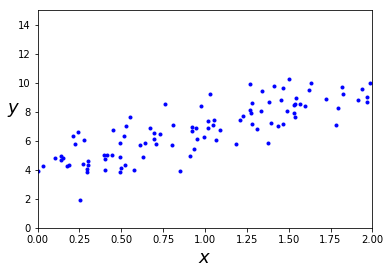

In [314]:

X = 2 * np.random.rand(100,1)
y = 4 +3 * X+np.random.randn(100,1)


plt.plot(X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ =plt.axis([0,2,0,15])



In [315]:
theta_best.shape

(2, 1)

In [316]:
# Analytical way of Linear Regression

X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[4.06867788]
 [2.81526286]]


In [317]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.06867788],
       [9.6992036 ]])

[0, 2, 0, 15]

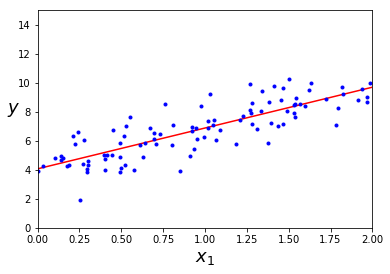

In [318]:
plt.plot(X_new,y_predict,'r-')
plt.plot(X,y,'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])

In [319]:
# Gradient descent approach
lr =0.01
n_iter = 10000

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          4.069,
Theta1:          2.815
Final cost/MSE:  0.554


In [320]:
cost_history

array([21.6051284 , 20.74658181, 19.92312533, ...,  0.55364922,
        0.55364922,  0.55364922])

In [321]:
lr =0.01
n_iter = 1000

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          3.971,
Theta1:          2.903
Final cost/MSE:  0.555


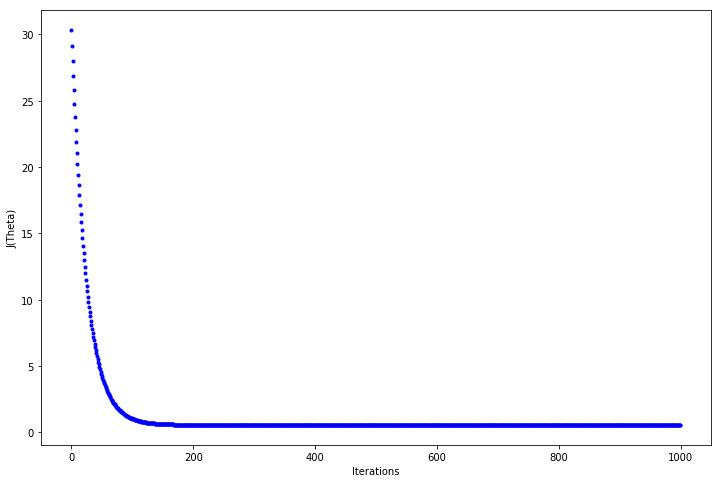

In [322]:
# Let's plot the cost history over iterations

fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

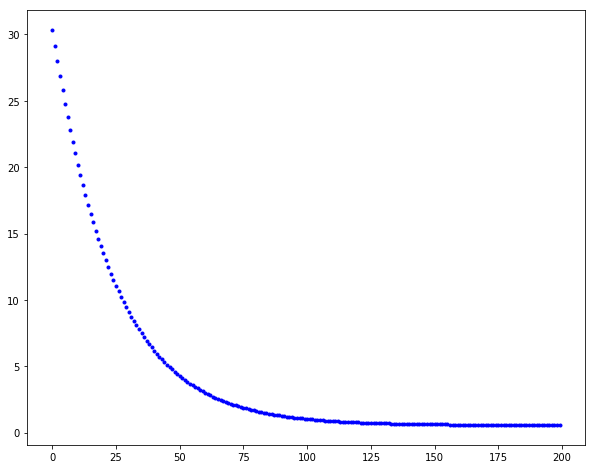

In [323]:
# After around 150 iterations the cost is flat so the remaining iterations are not needed or will not result in any further optimization. Let us zoom in till iteration 200 and see the curve

fig,ax = plt.subplots(figsize=(10,8))
_=ax.plot(range(200),cost_history[:200],'b.')

In [328]:
# Let us build a function which can show the effects together and also show how gradient decent actually is working

def plot_GD(n_iter,lr,ax,ax1=None):
    
    _ = ax.plot(X,y,'b.')
    theta = np.random.randn(2,1)

    tr =0.1
    cost_history = np.zeros(n_iter)
    for i in range(n_iter):
        pred_prev = X_b.dot(theta)
        theta,h,_ = gradient_descent(X_b,y,theta,lr,1)
        pred = X_b.dot(theta)

        cost_history[i] = h[0]

        if ((i % 25 == 0) ):
            _ = ax.plot(X,pred,'r-',alpha=tr)
            if tr < 0.8:
                tr = tr+0.2
        if not ax1== None:
        _ = ax1.plot(range(n_iter),cost_history,'b.')

IndentationError: expected an indented block (<ipython-input-328-51614bf6478f>, line 22)

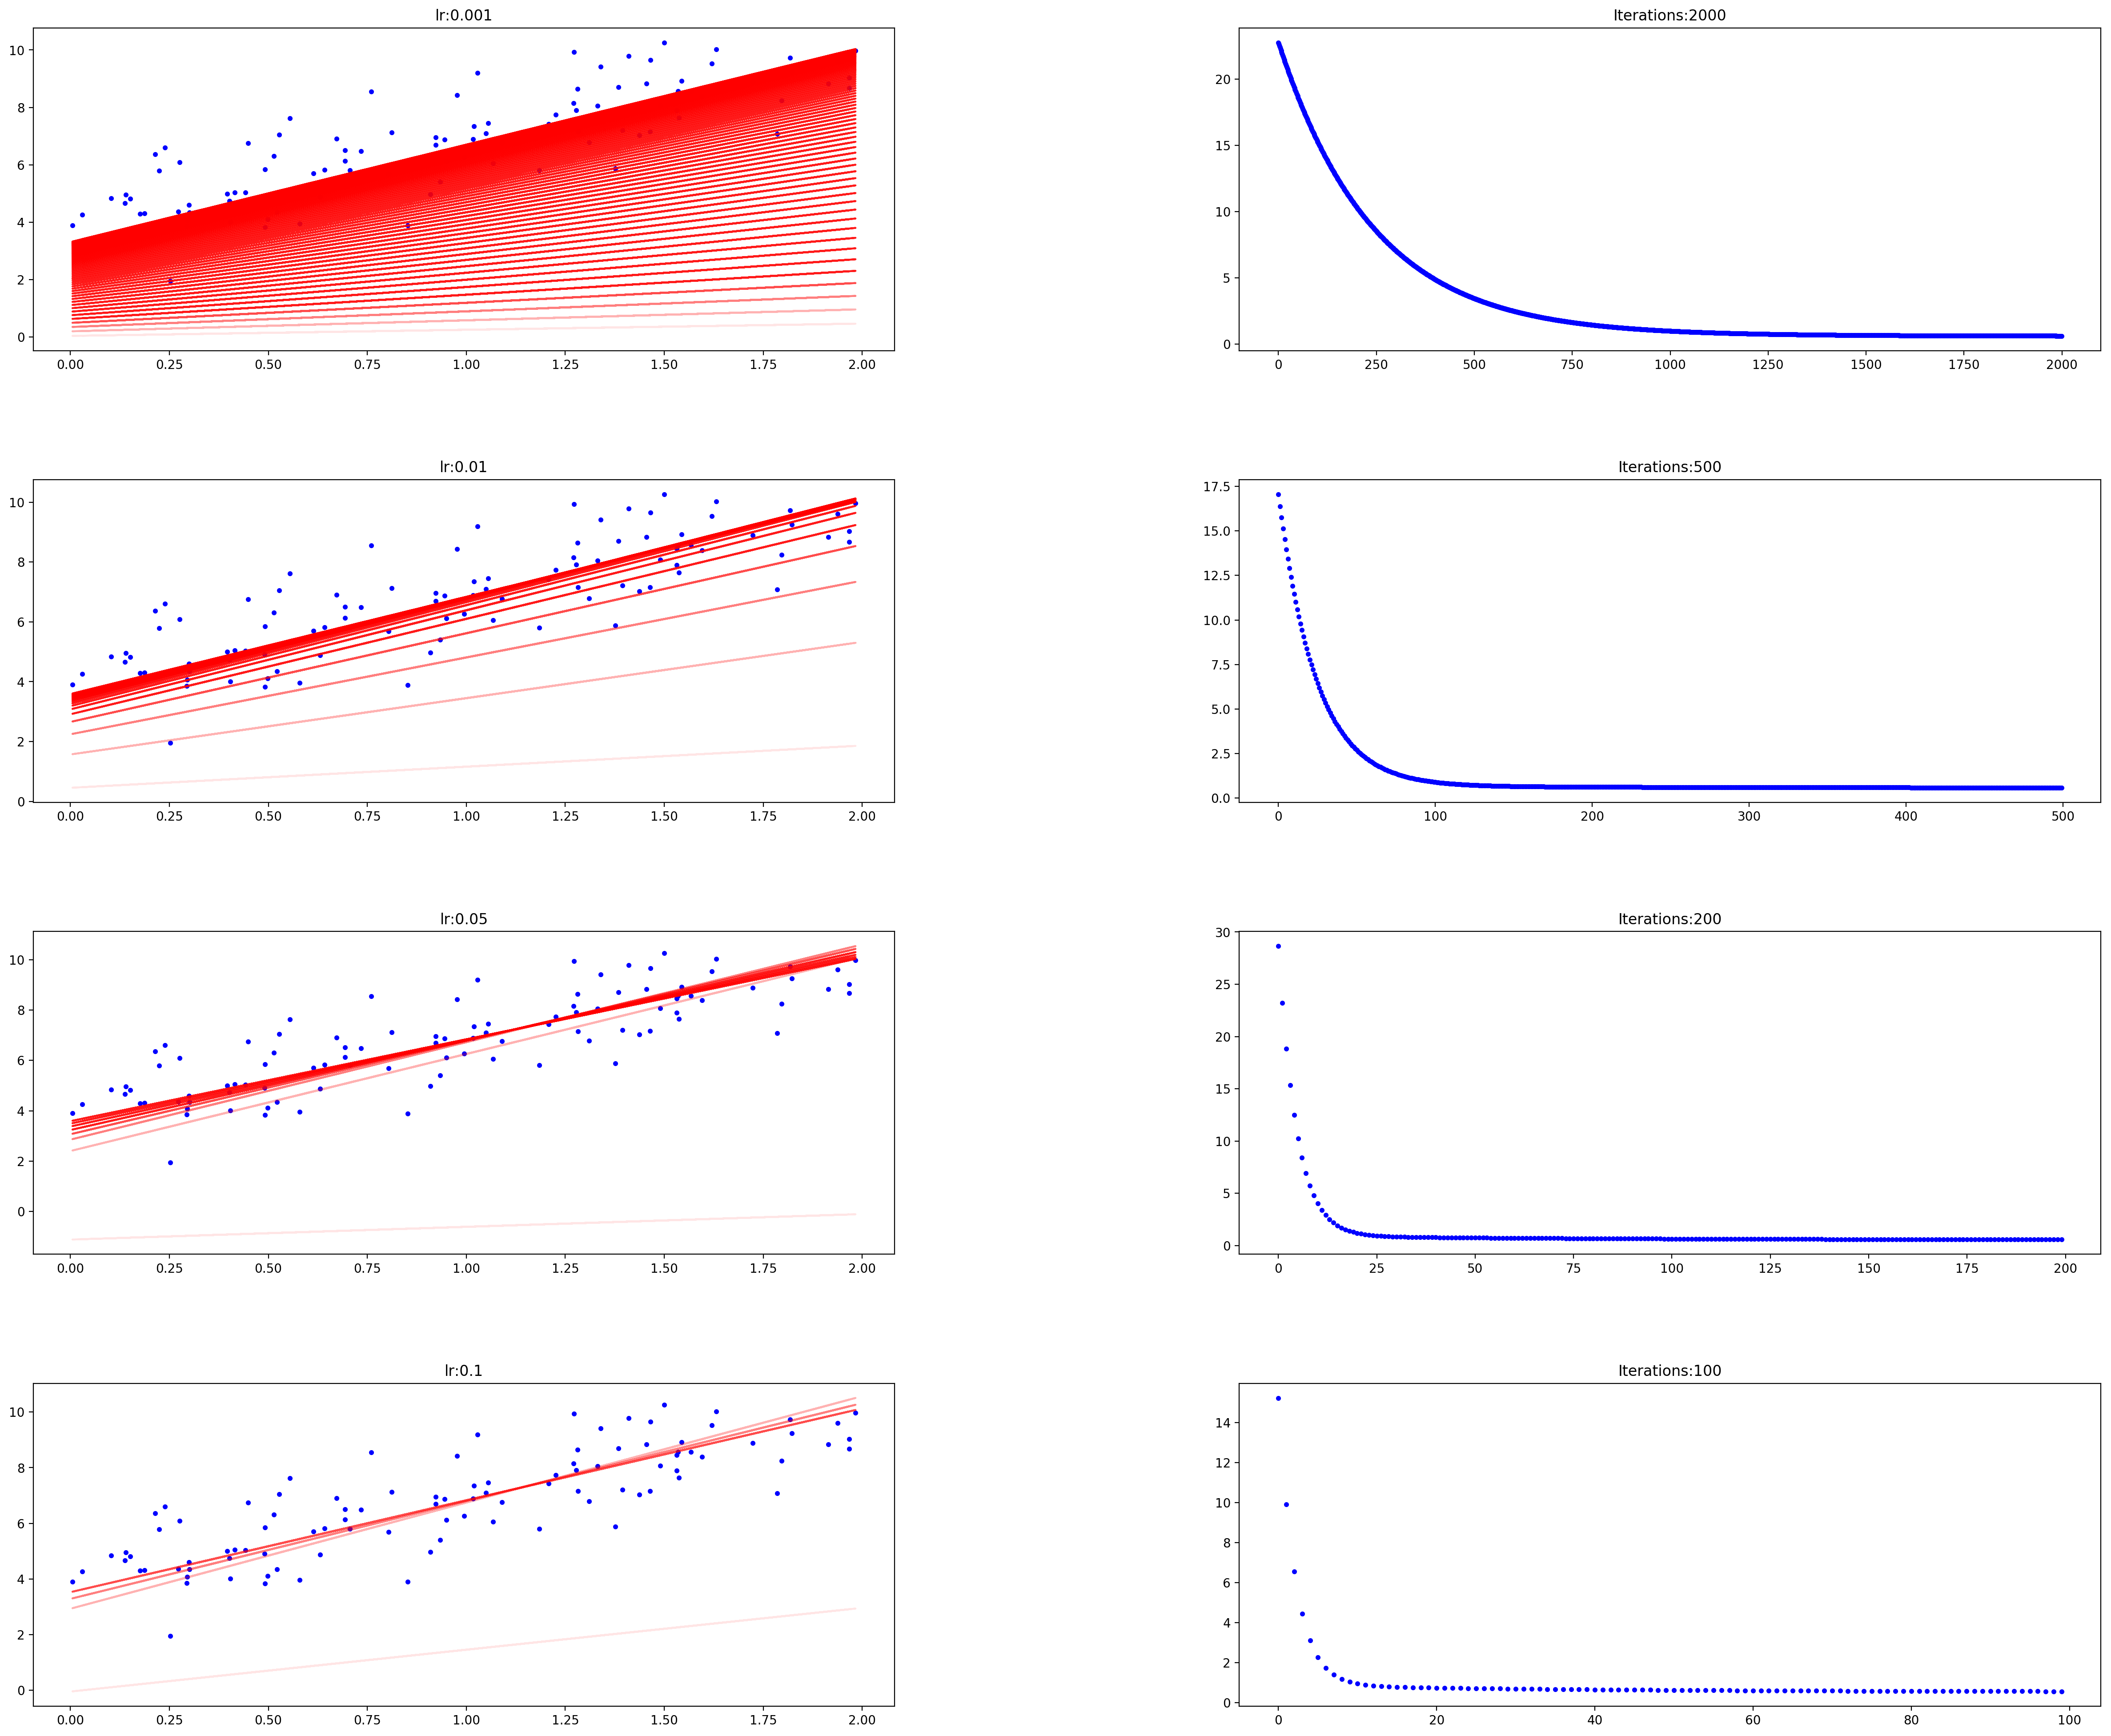

In [329]:
fig = plt.figure(figsize=(30,25),dpi=200)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

it_lr =[(2000,0.001),(500,0.01),(200,0.05),(100,0.1)]
count =0
for n_iter, lr in it_lr:
    count += 1
    
    ax = fig.add_subplot(4, 2, count)
    count += 1
   
    ax1 = fig.add_subplot(4,2,count)
    
    ax.set_title("lr:{}".format(lr))
    ax1.set_title("Iterations:{}".format(n_iter))
    plot_GD(n_iter,lr,ax,ax1)

In [332]:
# Extra: Stochastic gradient descent
def stocashtic_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    
    
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cost_function(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history



In [333]:
lr =0.5
n_iter = 50

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history = stocashtic_gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          4.060,
Theta1:          2.884
Final cost/MSE:  61.067


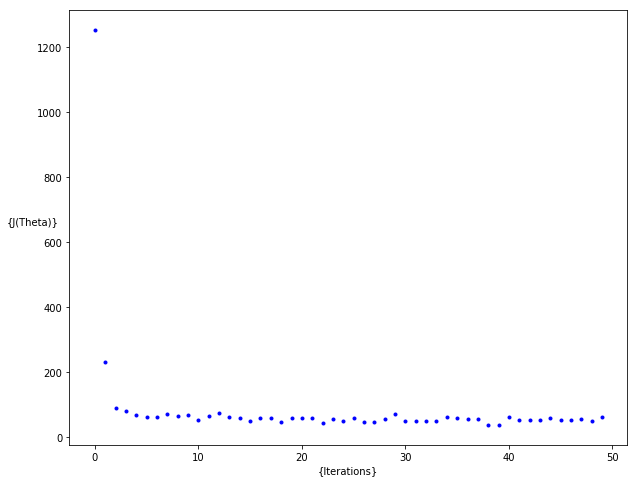

In [334]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

_=ax.plot(range(n_iter),cost_history,'b.')


In [ ]:
# Extra: Mini batch gradient descent
def minibatch_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10,batch_size =20):
    '''
    X    = Matrix of X without added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m/batch_size)
    
    for it in range(iterations):
        cost =0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            
            X_i = np.c_[np.ones(len(X_i)),X_i]
           
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

# Exercise 

Predict the housing market prices of the input data

In [8]:
train = pd.read_csv("input/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("input/house-prices-advanced-regression-techniques/test.csv")
